# Candlestick Stick Sandwich

https://www.investopedia.com/terms/s/stick-sandwich.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2020-01-01'
end = '2021-10-22'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000


## Candlestick with Stick Sandwich

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,737426.0,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,True
1,737427.0,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,True
2,737430.0,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,True
3,737431.0,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,False
4,737432.0,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,False


Text(0, 0.5, 'Price')

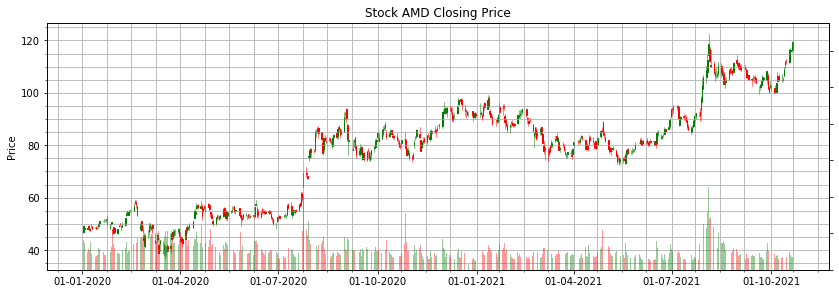

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
stick_sandwich = talib.CDLSTICKSANDWICH(df['Open'], df['High'], df['Low'], df['Close'])

stick_sandwich = stick_sandwich[stick_sandwich != 0]

In [6]:
df['stick_sandwich'] = talib.CDLSTICKSANDWICH(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['stick_sandwich'] !=0]

,Open,High,Low,Close,Adj Close,Volume,stick_sandwich
Date,,,,,,,
2020-01-14,48.639999,49.040001,47.910000,48.209999,48.209999,38563200,100
2021-04-14,79.879997,80.129997,77.940002,78.550003,78.550003,34263800,100


In [8]:
df['Adj Close'].loc[df['stick_sandwich'] !=0]

Date
2020-01-14    48.209999
2021-04-14    78.550003
Name: Adj Close, dtype: float64

In [9]:
df['stick_sandwich'].loc[df['stick_sandwich'] !=0].index

DatetimeIndex(['2020-01-14', '2021-04-14'], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
stick_sandwich

Date
2020-01-14    100
2021-04-14    100
dtype: int32

In [11]:
stick_sandwich.index

DatetimeIndex(['2020-01-14', '2021-04-14'], dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,stick_sandwich
Date,,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,0
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,0
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,0
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,0
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,0
...,...,...,...,...,...,...,...
2021-10-15,112.510002,112.839996,111.110001,112.120003,112.120003,34177700,0
2021-10-18,111.900002,116.879997,111.370003,116.430000,116.430000,47537800,0
2021-10-19,116.160004,117.169998,114.470001,116.330002,116.330002,39593900,0


Text(0, 0.5, 'Price')

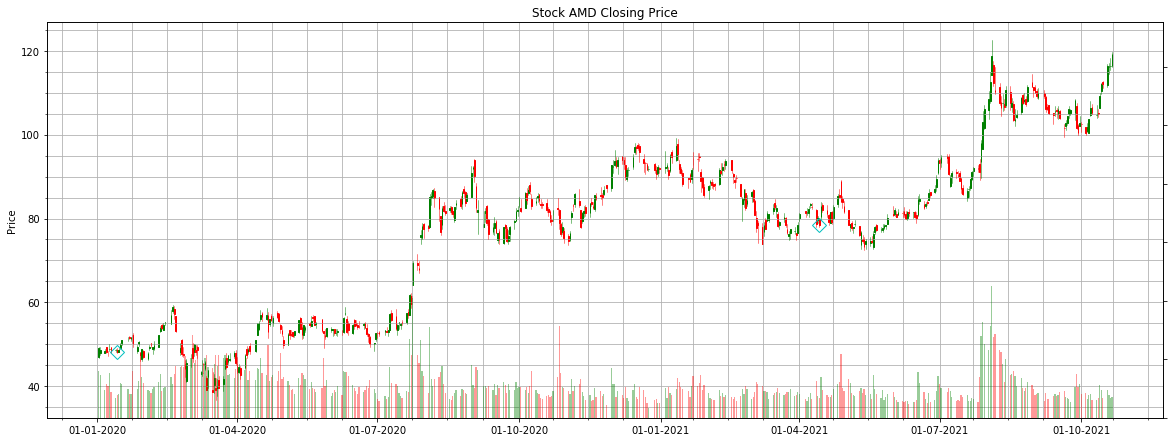

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['stick_sandwich'] !=0].index, df['Adj Close'].loc[df['stick_sandwich'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-04-01':'2021-05-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,stick_sandwich,VolumePositive
0,737881.0,80.160004,81.309998,79.480003,81.089996,81.089996,40182400,0,True
1,737885.0,81.739998,81.900002,80.389999,81.430000,81.430000,32610600,0,False
2,737886.0,81.209999,82.459999,80.879997,81.440002,81.440002,29327900,0,True
3,737887.0,81.320000,83.099998,80.349998,82.199997,82.199997,35590900,0,True
4,737888.0,83.320000,83.790001,82.440002,83.349998,83.349998,41925300,0,True


Text(0, 0.5, 'Price')

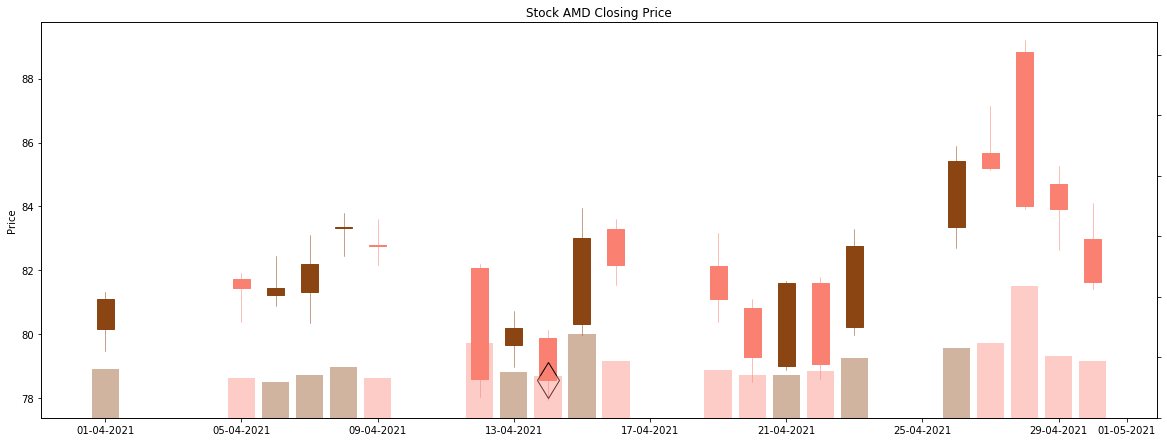

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('white')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='saddlebrown', colordown='salmon', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['stick_sandwich'] !=0].index, df['Adj Close'].loc[df['stick_sandwich'] !=0],
                'dk', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=25.0) 
colors = dfc.VolumePositive.map({True: 'saddlebrown', False: 'salmon'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

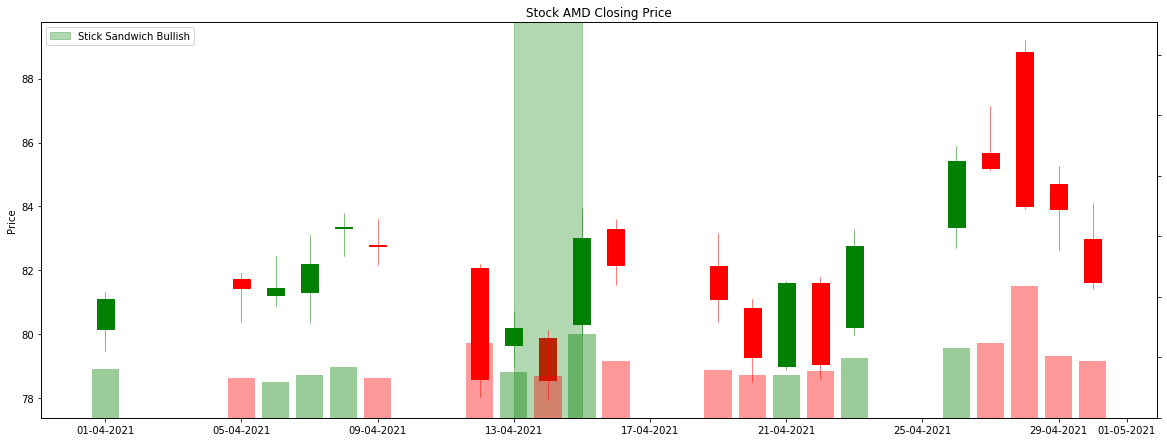

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,4,13)), date2num(datetime(2021,4,15)), 
           label="Stick Sandwich Bullish",color="green", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')